# Datalab 3
In module 3, you have learned to generate random numbers, do monte carlo simulations and bootstrap. You have also learned about estimators and the properties we want these to have: Unbiasedness and consistency. In this datalab, we will train abit more on these elements. We will use the maximum likelihood estimator of the exponential distribution as the running example. 

## Maximum likelihood estimator of the exponential distribution
The benefit of simulating data is that we have full control of the data-generating process. If we have observed some data, we may assume a distribution. When we generate (or simulate) data, we know the distribution.

In the lecture, we have seen that $1/\bar x$ is the maximum likelihood estimator for $\lambda$ in the exponential distribution. That is, $\hat\lambda =1/ \bar x$. In the documentation for *scipy.stats.expon* it says that *"A common parameterization for expon is in terms of the rate parameter lambda, such that pdf = lambda * exp(-lambda * x). This parameterization corresponds to using scale = 1 / lambda."* This corresponds to the parametrization we have considered $$f(x) = \lambda e^{-\lambda x},\quad x>0.$$ Assume that the true $\lambda$ is 5. We can generate a sample of size 10 from this distribution by:

In [1]:
from scipy import stats
import numpy as np
n=10
np.random.seed(123)
x = stats.expon.rvs(size = n, scale = 1/5)
print(x)

[0.23845443 0.0674135  0.05145682 0.16028674 0.25421419 0.11001951
 0.79019641 0.23092845 0.13114404 0.09955474]


If we calculate the maximum likelihood estimator, we get:

In [2]:
lambdahat = 1/x.mean()
print(lambdahat)

4.6867629636691435


As we saw in the lecture, this is a biased estimator. When the sample size increase, it is asymptoically unbiased, but for small samples we have a biased estimator. The expected value of $$\hat\lambda= \frac{n}{n-1}\lambda.$$ Let us try to bias-correct the estimator! What if we instead use $$\tilde\lambda = \frac{n-1}{n}\hat\lambda$$ as our estimator? Then the expected value of $\tilde\lambda$ is
$$E(\tilde\lambda) =  \frac{n-1}{n}E(\hat\lambda) =  \frac{n-1}{n} \frac{n}{n-1}\lambda = \lambda,$$
hence the estimator is unbiased! We also have that 
$$Var(\tilde\lambda) = \frac{(n-1)^2}{n^2}Var(\hat\lambda)<Var(\hat\lambda). $$
It seems we will get a better estimator both in terms of bias and uncertainty of the estimator, by a lower variance! We can have our cake and eat it too!

In [3]:
lambdatilde = lambdahat * (n-1)/n
print(lambdatilde)

4.218086667302229


We can use Monte Carlo simulations to confirm what the calculations above have told us! Let us simulate 10,000 samples of size ten, and calculate the two estimators. This will give us the sampling distribution of the two estimators. Since we know the true value (lambda = 5), we can also calculate the bias by $E(\hat\lambda)-5$, or just compare the expected value to the true value of 5.

In [4]:
n=10
n_sim = 10000 # number of simulations
# generate 10,000 samples of size 10: 
mc_samples = stats.expon.rvs(size=(n_sim, n), scale=1/5)
# Calculate 10,000 mean values: 
sample_means = np.mean(mc_samples, axis=1)
# Calculate 10,000 estimates: 
lambda_hats = 1 / sample_means
lambda_tildes = lambda_hats * (n - 1) / n
# Estimate bias:
print("Expected value of MLE: ", lambda_hats.mean())
print("Expected value of bias-corrected MLE: ", lambda_tildes.mean())
print("Standard deviation of MLE: ", lambda_hats.std())
print("Standard deviation of bias-corrected MLE: ", lambda_tildes.std())

Expected value of MLE:  5.551896183482894
Expected value of bias-corrected MLE:  4.9967065651346045
Standard deviation of MLE:  1.9464796168139185
Standard deviation of bias-corrected MLE:  1.7518316551325266


As can be seen from the output, the Monte-Carlo estimated expected value of the bias-corrected MLE is much closer to 5 than the MLE. We also see that the standard deviation of $\tilde\lambda$ is lower than that of $\hat\lambda$. Usually, we must pay for lower bias with increased variance, but not in this case! We can also plot the two sampling distributions. We can add a normal curve to see if the normal approximation is any good for such a low sample size. Note that these estimators are based on $1/\bar X$. The central limit theorem applies to $\bar X$. We can therefore not use it directly to say that $\tilde\lambda$ and $\hat\lambda$ will be asymptotically normal.

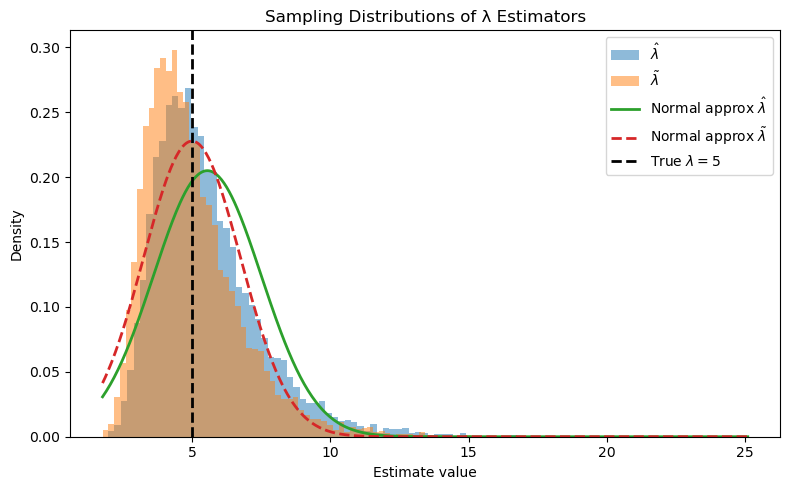

In [5]:
import matplotlib.pyplot as plt
true_lambda = 5

plt.figure(figsize=(8, 5))

# Histogram for lambda_hat
plt.hist(lambda_hats, bins=100, density=True, 
         alpha=0.5, label=r'$\hat{\lambda}$')

# Histogram for lambda_tilde
plt.hist(lambda_tildes, bins=100, density=True, 
         alpha=0.5, label=r'$\tilde{\lambda}$')
# Create x-grid for normal curves
x_vals = np.linspace(
    min(lambda_tildes.min(), lambda_hats.min()),
    max(lambda_tildes.max(), lambda_hats.max()),
    500
)

# Normal approximation for MLE
normal_hat = stats.norm.pdf(
    x_vals,
    loc=lambda_hats.mean(),
    scale=lambda_hats.std()
)

# Normal approximation for bias-corrected
normal_tilde = stats.norm.pdf(
    x_vals,
    loc=lambda_tildes.mean(),
    scale=lambda_tildes.std()
)

# Plot normal curves
plt.plot(x_vals, normal_hat, linewidth=2,
         label=r'Normal approx $\hat{\lambda}$')

plt.plot(x_vals, normal_tilde, linewidth=2,
         linestyle='--',
         label=r'Normal approx $\tilde{\lambda}$')

# Vertical line at true lambda
plt.axvline(true_lambda, color='black', linestyle='--', 
            linewidth=2, label=r'True $\lambda = 5$')

plt.xlabel("Estimate value")
plt.ylabel("Density")
plt.title("Sampling Distributions of λ Estimators")
plt.legend()
plt.tight_layout()
plt.show()

### Task
Now, increase the sample size to 100. 
- How does the bias of the estimators change?
- How the standard deviation change?
- What about the normal approximation?

What if you increase to n=1000?

### Solution
Let's make it as a function of n: 

Expected value of MLE:  5.051854119140471
Expected value of bias-corrected MLE:  5.0013355779490665
Standard deviation of MLE:  0.5076824166506869
Standard deviation of bias-corrected MLE:  0.50260559248418


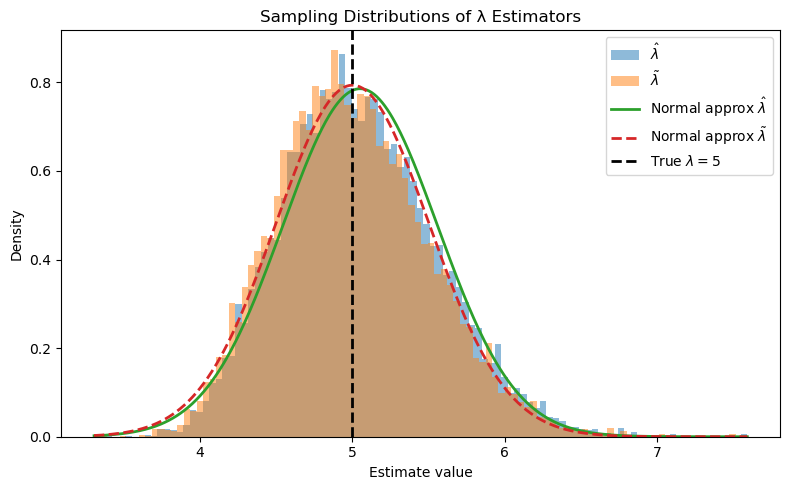

In [6]:
n = 100
def mc_expon(n = 10) : 
    n_sim = 10000 # number of simulations
    # generate 10,000 samples of size 10: 
    x = stats.expon.rvs(size=(n_sim, n), scale=1/5)
    # Calculate 10,000 mean values: 
    sample_means = np.mean(x, axis=1)
    # Calculate 10,000 estimates: 
    lambda_hats = 1 / sample_means
    lambda_tildes = lambda_hats * (n - 1) / n
    # Estimate bias:
    print("Expected value of MLE: ", lambda_hats.mean())
    print("Expected value of bias-corrected MLE: ", lambda_tildes.mean())
    print("Standard deviation of MLE: ", lambda_hats.std())
    print("Standard deviation of bias-corrected MLE: ", lambda_tildes.std())
    plt.figure(figsize=(8, 5))
    
    # Histogram for lambda_hat
    plt.hist(lambda_hats, bins=100, density=True, 
             alpha=0.5, label=r'$\hat{\lambda}$')
    
    # Histogram for lambda_tilde
    plt.hist(lambda_tildes, bins=100, density=True, 
             alpha=0.5, label=r'$\tilde{\lambda}$')
    # Create x-grid for normal curves
    x_vals = np.linspace(
        min(lambda_tildes.min(), lambda_hats.min()),
        max(lambda_tildes.max(), lambda_hats.max()),
        500
    )
    
    # Normal approximation for MLE
    normal_hat = stats.norm.pdf(
        x_vals,
        loc=lambda_hats.mean(),
        scale=lambda_hats.std()
    )
    
    # Normal approximation for bias-corrected
    normal_tilde = stats.norm.pdf(
        x_vals,
        loc=lambda_tildes.mean(),
        scale=lambda_tildes.std()
    )
    
    # Plot normal curves
    plt.plot(x_vals, normal_hat, linewidth=2,
             label=r'Normal approx $\hat{\lambda}$')
    
    plt.plot(x_vals, normal_tilde, linewidth=2,
             linestyle='--',
             label=r'Normal approx $\tilde{\lambda}$')
    # Vertical line at true lambda
    plt.axvline(true_lambda, color='black', linestyle='--', 
                linewidth=2, label=r'True $\lambda = 5$')
    
    plt.xlabel("Estimate value")
    plt.ylabel("Density")
    plt.title("Sampling Distributions of λ Estimators")
    plt.legend()
    plt.tight_layout()
    plt.show()
mc_expon(n=100)

With $n=100$, the difference becomes small between $\hat\lambda$ and $\tilde\lambda$. We see that the bias is strongly reduced for both, and the standard deviations also approach each other. The normal approximation seems good for both the MLE and the bias-corrected estimator. The sampling distributions are very similar, which makes sense since we just multiply $\hat\lambda$ by 0.99 to get $\tilde\lambda$. 

Expected value of MLE:  5.006130842966461
Expected value of bias-corrected MLE:  5.001124712123494
Standard deviation of MLE:  0.15888218285898884
Standard deviation of bias-corrected MLE:  0.15872330067612986


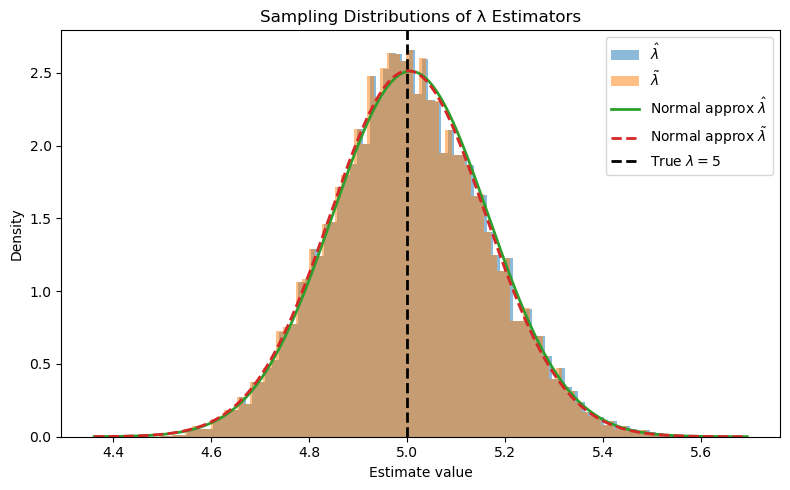

In [7]:
mc_expon(n=1000)

With $n=1000$ almost all bias is gone. At the distributions are tighter with smaller standard deviations and the normal approximation has improved even more. The point here is that for small samples, we may get improvement by using the bias-corrected estimate, but as n becomes large, it does not matter much, since the MLE is consistent. We have also indicated here that the sampling distribution is asymptotically normal, even though we cannot apply the central limit theorem directly (since the estimator is 1/mean and not the mean directly). 

## Bootstrap
Another way to check the properties of these estimators is by bootstrapping. Let us now just focus on the bias of the two estimators and assume that the first sample we generated is our dataset. Now, we can bootstrap the sampling distribution of $\hat\lambda$ by repeatedly sampling with replacement for the vector of observations.

In [8]:
bootstrap_samples = 10000
n=10
np.random.seed(1234)
x = stats.expon.rvs(size=n, scale=1/5) # Generate our data

# Original estimates
lambda_hat = 1 / x.mean()
# Store estimates for the bootstrap samples: 
hat_boots = np.zeros(bootstrap_samples)

# Loop of bootstrap: 
for b in range(bootstrap_samples):
    # Bootstrap resample: 
    boot_sample = np.random.choice(x, size=n, replace=True)
    # hatlambda for bootstrap sample: 
    hat_boots[b] = 1 / boot_sample.mean() 
# Print bias: 
print("Original estimate:", lambda_hat)
print("Original estimate bias:", lambda_hat-5)
print("Bootstrap bias:", hat_boots.mean()-5)
print("Bootstrap standard deviation:", hat_boots.std())


Original estimate: 4.0533822677373985
Original estimate bias: -0.9466177322626015
Bootstrap bias: -0.6922417115252832
Bootstrap standard deviation: 1.1229881263416048


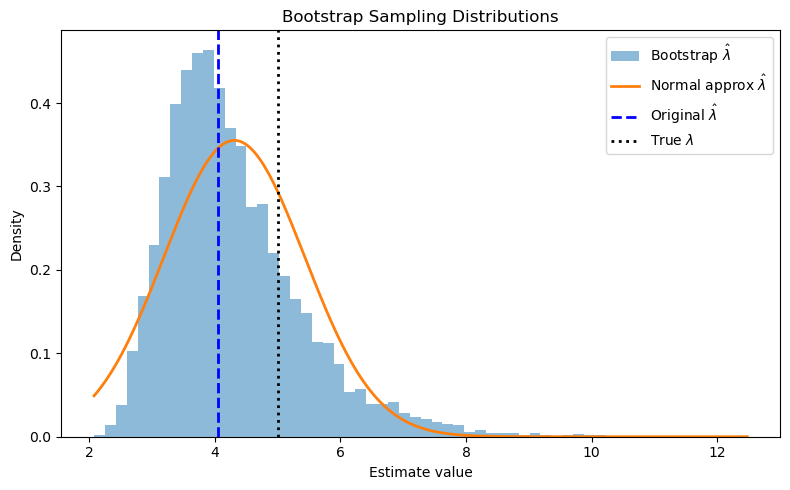

25% percentile: 3.5327873294450147
75% percentile: 4.848631911703407


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Plot
plt.figure(figsize=(8, 5))

# Histograms
plt.hist(hat_boots, bins=60, density=True,
         alpha=0.5, label=r'Bootstrap $\hat{\lambda}$')


# Grid for normal curves
x_vals = np.linspace(
    hat_boots.min(),
    hat_boots.max(),
    500
)

# Normal approximations (bootstrap mean & sd)
normal_hat = stats.norm.pdf(
    x_vals,
    loc=hat_boots.mean(),
    scale=hat_boots.std()
)


plt.plot(x_vals, normal_hat, linewidth=2,
         label=r'Normal approx $\hat{\lambda}$')


# Vertical lines
plt.axvline(lambda_hat, color='blue', linestyle='--',
            linewidth=2, label=r'Original $\hat{\lambda}$')

plt.axvline(true_lambda, color='black', linestyle=':',
            linewidth=2, label=r'True $\lambda$')

plt.xlabel("Estimate value")
plt.ylabel("Density")
plt.title("Bootstrap Sampling Distributions")
plt.legend()
plt.tight_layout()
plt.show()
print("25% percentile:", np.percentile(hat_boots, 25))
print("75% percentile:", np.percentile(hat_boots, 75))

Note that 10 is a quite low sample size. We get a high uncertainty of the estimators. The bias is roughly -1. Here the most interesting property we can get is the sampling distribution and perhaps the standard deviation of the estimator. If we make a 95% confidence interval based on the sampling distribution.


## Task
a) Find the 2.5% and 97.5th percentiles of the sampling distribution. Is the true value $\lambda = 5$ included in the interval?
b) Rerun the code with increasing sample size. How does this affect your conclusions?

In [10]:
def run_boot(n=10) :
    bootstrap_samples = 10000
    np.random.seed(1234)
    x = stats.expon.rvs(size=n, scale=1/5) # Generate our data
    
    # Original estimates
    lambda_hat = 1 / x.mean()
    
    
    # Store estimates for the bootstrap samples: 
    hat_boots = np.zeros(bootstrap_samples)
    
    # Loop of bootstrap: 
    for b in range(bootstrap_samples):
        # Bootstrap resample: 
        boot_sample = np.random.choice(x, size=n, replace=True)
        # hatlambda for bootstrap sample: 
        hat_boots[b] = 1 / boot_sample.mean() 
    # Print bias: 
    print("Original estimate:", lambda_hat)
    print("Original estimate bias:", lambda_hat-5)
    print("Bootstrap bias:", hat_boots.mean()-5)
    print("Bootstrap standard deviation:", hat_boots.std())

    # Plot
    plt.figure(figsize=(8, 5))
    
    # Histograms
    plt.hist(hat_boots, bins=60, density=True,
             alpha=0.5, label=r'Bootstrap $\hat{\lambda}$')
    
    # Grid for normal curves
    x_vals = np.linspace(
        hat_boots.min(),
        hat_boots.max(),
        500
    )
    
    # Normal approximations (bootstrap mean & sd)
    normal_hat = stats.norm.pdf(
        x_vals,
        loc=hat_boots.mean(),
        scale=hat_boots.std()
    )

    plt.plot(x_vals, normal_hat, linewidth=2,
             label=r'Normal approx $\hat{\lambda}$')
        
    # Vertical lines
    plt.axvline(lambda_hat, color='blue', linestyle='--',
                linewidth=2, label=r'Original $\hat{\lambda}$')
    
    plt.axvline(true_lambda, color='black', linestyle=':',
                linewidth=2, label=r'True $\lambda$')
    
    plt.xlabel("Estimate value")
    plt.ylabel("Density")
    plt.title("Bootstrap Sampling Distributions")
    plt.legend()
    plt.tight_layout()
    plt.show()
    # -------------problem (a) ----------------
    print("25% percentile:", np.percentile(hat_boots, 25)) # add the percentiles here
    print("75% percentile:", np.percentile(hat_boots, 75))
    # -----------------------------------------


Original estimate: 4.751351171234731
Original estimate bias: -0.24864882876526906
Bootstrap bias: -0.24146246748113231
Bootstrap standard deviation: 0.15755556718322639


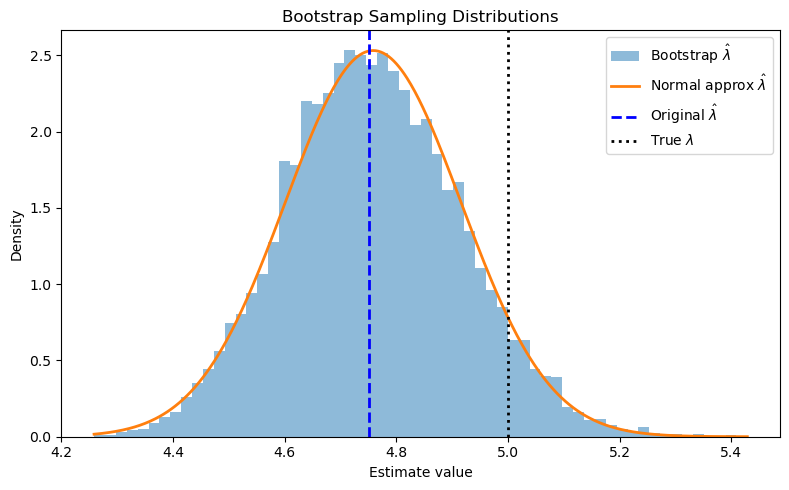

25% percentile: 4.649227411015924
75% percentile: 4.863236383688913


In [11]:
# n = 20
run_boot(n=1000)

As we increase the sample size, the interquartile range seem to cover the true value. We also see from the plot that true value can be very close to the true value. 

## Parametric bootstrap
Now, another way to use this bootstrap estimate is to bootstrap the bias. If we assume we do not now the true value of $\lambda$, but we want to estimate the bias. We could then turn to a parametric bootstrap. We assume that our data is generated from an exponential distribution, but we do not now parameter. We can then estimate the parameter from our sample, and use that to simulate new bootstrap samples from an exponential distribution. This is not the same as bootstrapping, because we generate new data. The technique is maybe more similar to Monte Carlo, except that we have estimated the parameters for this particular dataset. 

We will now only focus on $\hat\lambda$. We simulate 10,000 new datasets of size 10 using the estimate of $\hat\lambda$ as the true value. We estimate using the estimator $\hat\lambda$ on the 10,000 bootstrap samples and estimate the bias as the bootstrap average - original estimate (which is the true value for these generated data). We can then bias-correct the original estimate by 

$$\hat\lambda_{\text{bias-correct}} = \hat\lambda - \text{bias}_\text{boot},$$
where $$\text{bias}_\text{boot}= \sum_{b=1}^B \hat\lambda_b - \hat\lambda.$$

## Task
- Implement this procedure. Is the bias correction improving the estimate?

### Solution

In [12]:
n=50
np.random.seed(123)
x = stats.expon.rvs(size = n, scale = 1/5)
lambdahat = 1/x.mean()
n_sim = 10000 # number of simulations
# generate 10,000 samples of size 10: 
x = stats.expon.rvs(size=(n_sim, n), scale=1/lambdahat)
# Calculate 10,000 mean values: 
sample_means = np.mean(x, axis=1)
# Calculate 10,000 estimates: 
lambda_hats = 1 / sample_means
bias = lambda_hats.mean() - lambdahat
bias_corrected = lambdahat-bias
print("Original estimate:", lambdahat)
print("Estimated bias:", bias)
print("Parametric bootstrap-bias-corrected estimate:", bias_corrected)

Original estimate: 5.462952087427935
Estimated bias: 0.10720442724116364
Parametric bootstrap-bias-corrected estimate: 5.355747660186771


The bias-correction reduces the bias in the original estimate.